# Web Scrape

#### Step 1: Import libraries

#### Step 2: Create a list with all urls

#### Step 3: Loop through each link:
* Get html
* Build table
* Concat all tables

#### Step 4: Expand rows with compact values

# Import Libraries

In [2]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# Create list with all URLs

In [3]:
filterDay = ['yesterday', 'today', 'tomorrow']

filterHour = [str(i) for i in range(0, 24, 6)]

# Departures

In [4]:
df_departures = pd.DataFrame(columns=['Destination City', 'Destination Code', 'Departure', 'Flight', 'Airline', 'Terminal', 'Status', 'Date', 'Reference Day', 'url'])
for day in filterDay:
    for hour in filterHour:
        url = f'https://www.santiago-airport.com/scl-departures?day={day}&tp={hour}'
        request = requests.get(url)
        soup = BeautifulSoup(request.text, 'html.parser')
        reference_day = url.split('=')[1][:-3]
        date = soup.find('option', {'selected': 'selected'}).text.split(' ')[0] if reference_day != 'Tomorrow' else soup.find('option', {'value': '?day=tomorrow'}).text.split(' ')[0]
        rows = []
        for flight in soup.find_all('div', class_='flight-row')[1:]:
            if flight.find('div', {'class', 'adsense'}): # advertisement row
                continue
            destination = flight.find('div', {'class', 'flight-col flight-col__dest-term'}).find('b').text
            destination_code = flight.find('div', {'class', 'flight-col flight-col__dest-term'}).find('span').text
            departure = flight.find('div', {'class', 'flight-col flight-col__hour'}).text.strip()
            flight_number = flight.find('div', {'class', 'flight-col flight-col__flight'}).text.strip().split('\n')
            airline = flight.find('div', {'class', 'flight-col flight-col__airline'}).text.strip().split('\n')
            terminal = flight.find('div', {'class', 'flight-col flight-col__terminal'}).text.strip()
            status = flight.find_all('a')[-1].text
            for i in range(max(len(flight_number), len(airline))):
                rows.append({
                    'Destination City': destination,
                    'Destination Code': destination_code,
                    'Departure': departure,
                    'Flight': flight_number[i] if i < len(flight_number) else '',
                    'Airline': airline[i] if i < len(airline) else '',
                    'Terminal': terminal,
                    'Status': status,
                    'Date': date,
                    'Reference Day': reference_day,
                    'url': url
                })
        df_departures = pd.concat([df_departures, pd.DataFrame(rows)], ignore_index=True)

# Arrivals

In [48]:
df_arrivals = pd.DataFrame(columns=['Origin City', 'Origin Code', 'Arrival', 'Flight', 'Airline', 'Terminal', 'Status', 'Date', 'Reference Day', 'url'])

for day in filterDay:
    for hour in filterHour:
        url = f'https://www.santiago-airport.com/scl-arrivals?day={day}&tp={hour}'
        request = requests.get(url)
        soup = BeautifulSoup(request.text, 'html.parser')
        reference_day = url.split('=')[1][:-3]
        date = soup.find('option', {'selected': 'selected'}).text.split(' ')[0] if reference_day != 'Tomorrow' else soup.find('option', {'value': '?day=tomorrow'}).text.split(' ')[0]
        rows = []
        for flight in soup.find_all('div', class_='flight-row')[1:]:
            if flight.find('div', {'class', 'adsense'}): # advertisement row
                continue
            origin = flight.find('div', {'class', 'flight-col flight-col__dest-term'}).find('b').text
            origin_code = flight.find('div', {'class', 'flight-col flight-col__dest-term'}).find('span').text
            arrival = flight.find('div', {'class', 'flight-col flight-col__hour'}).text.strip()
            flight_number = flight.find('div', {'class', 'flight-col flight-col__flight'}).text.strip().split('\n')
            airline = flight.find('div', {'class', 'flight-col flight-col__airline'}).text.strip().split('\n')
            terminal = flight.find('div', {'class', 'flight-col flight-col__terminal'}).text.strip()
            status = flight.find_all('a')[-1].text[:-4]
            for i in range(max(len(flight_number), len(airline))):
                rows.append({
                    'Origin City': origin,
                    'Origin Code': origin_code,
                    'Arrival': arrival,
                    'Flight': flight_number[i] if i < len(flight_number) else '',
                    'Airline': airline[i] if i < len(airline) else '',
                    'Terminal': terminal,
                    'Status': status,
                    'Date': date,
                    'Reference Day': reference_day,
                    'url': url
                })
        df_arrivals = pd.concat([df_arrivals, pd.DataFrame(rows)], ignore_index=True)

In [49]:
df_departures['Date_Time'] = pd.to_datetime(df_departures.Date + "-" + df_departures.Departure, format='%Y-%m-%d-%H:%M')
df_arrivals['Date_Time'] = pd.to_datetime(df_arrivals.Date + "-" + df_arrivals.Arrival, format='%Y-%m-%d-%H:%M')

# Add Columns

In [50]:
city_country = {
    'Antofagasta': 'Chile',
    'Lima': 'Peru',
    'Buenos Aires': 'Argentina',
    'Sao Paulo': 'Brazil',
    'Calama': 'Chile',
    'Concepcion': 'Chile',
    'Iquique': 'Chile',
    'Puerto Montt': 'Chile',
    'Bogota': 'Colombia',
    'Temuco': 'Chile',
    'La Serena': 'Chile',
    'Madrid': 'Spain',
    'Copiapo': 'Chile',
    'Miami': 'United States',
    'Punta Arenas': 'Chile',
    'Panama City': 'Panama',
    'Rio De Janeiro': 'Brazil',
    'Arica': 'Chile',
    'Auckland': 'New Zealand',
    'New York': 'United States',
    'Montevideo': 'Uruguay',
    'Mendoza': 'Argentina',
    'Atlanta': 'United States',
    'Valdivia': 'Chile',
    'Osorno': 'Chile',
    'Paris': 'France',
    'Cordoba': 'Argentina',
    'Houston': 'United States',
    'Los Angeles': 'United States',
    'Balmaceda': 'Chile',
    'Porto Alegre': 'Brazil',
    'Castro': 'Chile',
    'London': 'United Kingdom',
    'Asuncion': 'Paraguay',
    'Mexico City': 'Mexico',
    'Guayaquil': 'Ecuador',
    'Curitiba': 'Brazil',
    'Easter Island': 'Chile',
    'Florianopolis': 'Brazil',
    'Sydney': 'Australia',
    'Cali': 'Colombia',
    'San Juan': 'Argentina',
    'Toronto': 'Canada',
    'Santa Cruz': 'Bolivia',
    'Iguassu Falls': 'Brazil',
    'Dallas': 'United States',
    'Quito': 'Ecuador',
    'Trujillo': 'Peru'
}


In [51]:
df_departures['Destination Country'] = df_departures['Destination City'].map(city_country)
df_arrivals['Origin Country'] = df_arrivals['Origin City'].map(city_country)

In [52]:
Airline_Parent_Company = {
    'Copa Airlines': 'Copa Holdings',
    'LATAM Airlines': 'LATAM Airlines Group',
    'Delta Air Lines': 'Delta Air Lines Inc.',
    'Qantas': 'Qantas Airways Limited',
    'Cathay Pacific': 'Swire Pacific Limited',
    'Malaysia Airlines': 'Malaysia Aviation Group',
    'Avianca': 'Avianca Holdings S.A.',
    'Air Canada': 'Air Canada',
    'Atlas Air': 'Atlas Air Worldwide Holdings',
    'Sky Airline': 'Sky Airline S.A.',
    'JetSMART': 'Indigo Partners',
    'British Airways': 'International Airlines Group',
    'LATAM Cargo Chile': 'LATAM Airlines Group',
    'DHL Aero Expreso': 'DHL Aviation (Panama) S.A.',
    'Aerolineas Argentinas': 'Argentine government',
    'Iberia': 'International Airlines Group',
    'KLM Royal Dutch Airlines': 'Air France-KLM',
    'El Al Israel Airlines': 'Kanaf Arkia Holdings Ltd',
    'Qatar Airways': 'Qatar Airways Group',
    'Turkish Airlines': 'Turkish Airlines',
    'Air France': 'Air France-KLM',
    'Aeromexico': 'Delta Air Lines Inc.',
    'ITA Airways': 'Italian government',
    'United Airlines': 'United Airlines Holdings',
    'ANA All Nippon Airways': 'ANA Holdings Inc.',
    'American Airlines': 'American Airlines Group',
    'Air Europa': 'Globalia',
    'Korean Air': 'Hanjin Group',
    'JAL Japan Airlines': 'Japan Airlines Co. Ltd.',
    'LATAM Cargo Brasil': 'LATAM Airlines Group',
    'JetSMART Airlines Peru': 'Indigo Partners',
    'Jetsmart Airlines': 'Indigo Partners',
    'Ethiopian Airlines': 'Ethiopian government',
    'Martinair': 'Air France-KLM'
}


In [53]:
df_departures['Parent Company'] = df_departures['Airline'].map(Airline_Parent_Company)
df_arrivals['Parent Company'] = df_arrivals['Airline'].map(Airline_Parent_Company)

In [54]:
df_departures['Date_Time'] = pd.to_datetime(df_departures.Date + "-" + df_departures.Departure, format='%Y-%m-%d-%H:%M')
df_arrivals['Date_Time'] = pd.to_datetime(df_arrivals.Date + "-" + df_arrivals.Arrival, format='%Y-%m-%d-%H:%M')

In [ ]:
# save csv
# df_departures.to_csv('departures.csv', index=False)
# df_arrivals.to_csv('arrivals.csv', index=False)

In [ ]:
df_departures.Destination.value_counts().plot(kind='bar', title='Destination Counts', figsize=(15,5), fontsize=12, color='green')

# %%

In [ ]:
df_departures['Destination Country'].value_counts().plot(kind='bar', title='Destination Counts', figsize=(15,5), fontsize=12, color='purple')

In [ ]:
df_arrivals['Origin Country'].value_counts().plot(kind='bar', title='Origin Counts', figsize=(15,5), fontsize=12, color='purple')

In [ ]:
domestic_flights = df_departures['Destination Country'].value_counts()['Chile']
international_flights = df_departures[df_departures['Destination Country'] != 'Chile']


In [ ]:
import matplotlib.pyplot as plt
df_departures[df_departures['Destination Country'] != 'Chile']['Airline'].value_counts().plot(kind='bar', title='Airline Counts (Non-Chile)')
plt.show()

# %%

In [ ]:
# International (not chile)
airline_leading_name = df_departures[df_departures['Destination Country'] != 'Chile']['Airline'].value_counts().nlargest(1).index[0]
airline_leading_amount = df_departures[df_departures['Destination Country'] != 'Chile']['Airline'].value_counts().nlargest(1).values[0]
airline_leading_percentage = round(airline_leading_amount / df_departures['Airline'].value_counts().sum() * 100)

# Chile
airline_leading_name_chile = df_departures[df_departures['Destination Country'] == 'Chile']['Airline'].value_counts().nlargest(1).index[0]
airline_leading_amount_chile = df_departures[df_departures['Destination Country'] == 'Chile']['Airline'].value_counts().nlargest(1).values[0]
airline_leading_percentage_chile = round(airline_leading_amount_chile / df_departures['Airline'].value_counts().sum() * 100)

In [ ]:
round(airline_leading_amount / df_departures['Airline'].value_counts().sum() * 100)

In [ ]:
airline_leading_percentage
airline_leading_amount

In [ ]:
# top 5 destinations

df_departures.Destination.value_counts().plot(kind='bar', title='Destinations', figsize=(10,5), fontsize=12, rot=0, color='green', alpha=0.8)

In [ ]:
df_departures.Destination.value_counts().nlargest(4).index.tolist()

In [ ]:
import matplotlib.pyplot as plt

# get the value counts for the destinations
value_counts = df_departures.Destination.value_counts()

# create a mask for the top 5 destinations
mask = value_counts.rank(ascending=False, method='first') <= 5

# plot the bar chart
plt.figure(figsize=(10,5))
plt.bar(x=value_counts.index, height=value_counts.values, color=['yellow' if m else 'green' for m in mask], alpha=0.8)
plt.xticks(rotation=0, fontsize=12)
plt.title('Destinations', fontsize=14)
plt.show()


In [ ]:
df_departures[['Flight', 'Departure', 'Reference Day']]

In [ ]:
df_departures[[
    'Destination', 'Destination Code', 'Departure', 'Flight', 'Airline',
    'Terminal', 'Status', 'Date', 'Reference Day',
    'Destination Country', 'Departure_Time']
]

In [ ]:
df_arrivals.describe()

In [ ]:
df_departures['Departure_Time'] = pd.to_datetime(df_departures['Departure'], format='%H:%M')

In [ ]:
# group flights by departure time and count the number of flights
df_grouped = df_departures.groupby('Departure_Time').size().reset_index(name='Count')

# create the line plot using matplotlib
plt.plot(df_grouped['Departure_Time'], df_grouped['Count'], color='blue', linewidth=2)

# set the x and y axis labels
plt.xlabel('Departure Time')
plt.ylabel('Number of Flights')

# show the plot
plt.show()

In [ ]:
import matplotlib.pyplot as plt

# create a dictionary to map the reference day to a color
color_map = {'yesterday': 'blue', 'today': 'green', 'tomorrow': 'red'}

# create a scatter plot of departure time vs. flight count, with different colors depending on the day
fig, ax = plt.subplots()
for day, group in df_departures.groupby('Reference Day'):
    ax.scatter(group['Departure'], group.index, label=day, color=color_map[day], alpha=0.5)

# set the x-axis label and tick labels
ax.set_xlabel('Departure Time')
ax.set_xticklabels(df['Departure'].unique(), rotation=90)

# set the y-axis label and tick labels
ax.set_ylabel('Flight Count')
ax.set_yticks(df.index)
ax.set_yticklabels(df['Flight'])

# add a legend
ax.legend()

# show the plot
plt.show()


In [ ]:
df_departures[df_departures.Status == 'Landed - Delayed [+]'][['Airline','Status']]

In [ ]:
import pandas as pd
from scipy.stats import chi2_contingency

# Create a contingency table of the frequencies
contingency_table = pd.crosstab(df_departures['Airline'], df_departures['Status'])

# Run the chi-squared test of independence
chi2_statistic, p_value, dof, expected_freq = chi2_contingency(contingency_table)

# Print the results
print('Chi-squared statistic: {:.2f}'.format(chi2_statistic))
print('Degrees of freedom: {}'.format(dof))
print('P-value: {:.4f}'.format(p_value))


In [ ]:
import numpy as np

# Calculate Cramer's V coefficient
def cramers_v(confusion_matrix):
    chi2 = chi2_statistic
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

cramers_v_coef = cramers_v(contingency_table.values)

print('Cramer\'s V coefficient: {:.2f}'.format(cramers_v_coef))


In [ ]:
df_departures.Destination.value_counts()#[df_departures.Destination == 'Panama City']
df_departures.Destination[df_departures.Destination == 'Rio De Janeiro']

In [ ]:
df_departures[(df_departures['Destination'].isin(['Sao Paulo', 'Panama City']))]

In [ ]:
df_departures

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

# Create a scatter plot of the data
sns.scatterplot(data=df_departures, x='Destination Country', y='Departure_Time')

# Fit a linear regression model to the data
model = LinearRegression()
X = df_departures[['Destination Country']]
y = df_departures['Departure_Time']
model.fit(X, y)

# Get the coefficients and intercept of the linear regression line
slope = model.coef_[0]
intercept = model.intercept_

# Plot the linear regression line
x_values = df_departures['Destination Country'].unique()
y_values = intercept + slope * x_values
plt.plot(x_values, y_values, color='red')

# Add labels and title to the plot
plt.xlabel('Destination Country')
plt.ylabel('Departure Time')
plt.title('Linear Regression of Destination vs. Departure Time')

# Show the plot
plt.show()


In [ ]:
df_departures.describe()

## Descriptive statistics

In [ ]:
airlines_amount =  df_departures.Airline.nunique()

df_departures.Airline.nunique()

In [ ]:
600 / 36

In [ ]:
round(6 / airlines_amount * 100)

In [ ]:
top_6_airlines_list = df_departures.Airline.value_counts().head(6).index.tolist()
top_6_airlines_flight_amount = df_departures[df_departures['Airline'].isin(top_6_airlines_list)].Flight.nunique()
top_6_airlines_flight_amount

In [ ]:
sum_flight_amount_top6_airlines = 

In [ ]:
top_6_airlines_amount = 6
top_6_airlines_list = df_departures.Airline.value_counts().index[:top_6_airlines_amount].tolist()
sum_flight_amount_top6_airlines = df_departures[df_departures['Airline'].isin(top_6_airlines_list)].Flight.nunique()
sum_flight_amount_top6_airlines

In [ ]:
df_departures.Airline.value_counts().index[:top_airlines_amount].tolist()

In [ ]:
df_departures.groupby('Airline')['Flight'].count().sum()

In [ ]:
df_departures.groupby('Airline')['Flight'].count().nlargest(2).sum()

In [ ]:
412 / 774 * 100

In [ ]:

# Create a sample dataframe
data = {'Airlines': ['Delta', 'American Airlines', 'United Airlines', 'Delta', 'Southwest', 'American Airlines', 'Delta'],
        'Flights': ['DL101', 'AA205', 'UA302', 'DL303', 'SW205', 'AA303', 'DL401']}
df = pd.DataFrame(data)

# Get the top 2 most frequent airlines
top_airlines = df['Airlines'].value_counts().nlargest(2).index.tolist()

# Filter the dataframe for only the top 2 airlines
df_top_airlines = df[df['Airlines'].isin(top_airlines)]

# Create a bar chart using Altair
chart = alt.Chart(df_top_airlines).mark_bar().encode(
    y=alt.Y('Airlines:N', sort='-x'),
    x=alt.X('count(Flights):Q', title='Number of Flights')
)

# Set the chart options
chart = chart.properties(
    width=700,
    height=400
)

# Render the chart using Streamlit
# st.altair_chart(chart, use_container_width=True)

chart.show()


# DATA DISCOVERING INSIGHTS

In [ ]:
df_departures

# Simple Plot 1: FLIGHTS PER HOUR

x-axis: only the hours
y-axis: number of flughts

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# create a new column with the hour of the date/time
df_departures['Hour'] = df_departures['Date_Time'].dt.hour

# group by hour and count the number of flights
hourly_flights = df_departures.groupby('Hour').count()['Flight']

# create the bar chart
plt.bar(hourly_flights.index, hourly_flights.values)

# set the x-axis ticks to show only the hour
plt.xticks(hourly_flights.index)

# set the x and y axis labels
plt.xlabel('Hour of the Day')
plt.ylabel('Number of flights')

# show the plot
plt.show()


In [ ]:
df_departures['Hour'] = df_departures['Date_Time'].dt.hour

df_departures['Hour'].describe()

In [ ]:
df_departures['Hour'].mode()[0]

In [ ]:
df_departures['Hour'].median()

In [ ]:
df_departures['Hour'].mean()

In [ ]:
df_departures['Hour'].skew()

In [ ]:
df_departures['Hour'].kurtosis()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# create a new column with the hour of the date/time
df_departures['Hour'] = df_departures['Date_Time'].dt.hour

# create a new column with the 6-hour interval
df_departures['Interval'] = pd.cut(df_departures['Hour'], bins=range(0, 25, 6), right=False, labels=['0-6', '6-12', '12-18', '18-24'])

# group by 6-hour interval and count the number of flights
interval_flights = df_departures.groupby('Interval').count()['Flight']

# create the bar chart
plt.bar(interval_flights.index, interval_flights.values)

# set the x-axis ticks to show the intervals
plt.xticks(interval_flights.index)

# set the x and y axis labels
plt.xlabel('Time Interval (hours)')
plt.ylabel('Number of flights')

# show the plot
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# create a new column with the hour of the date/time
df_departures['Hour'] = df_departures['Date_Time'].dt.hour

# create a new column with the 12-hour interval
df_departures['Interval'] = pd.cut(df_departures['Hour'], bins=range(0, 25, 12), right=False, labels=['0-12', '12-24'])

# group by 12-hour interval and count the number of flights
interval_flights = df_departures.groupby('Interval').count()['Flight']

# create the bar chart
plt.bar(interval_flights.index, interval_flights.values)

# set the x-axis ticks to show the intervals
plt.xticks(interval_flights.index)

# set the x and y axis labels
plt.xlabel('Time Interval (hours)')
plt.ylabel('Number of flights')

# show the plot
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# create a new column with the hour of the date/time
df_arrivals['Hour'] = df_arrivals['Date_Time'].dt.hour

# create a new column with the 12-hour interval
df_arrivals['Interval'] = pd.cut(df_arrivals['Hour'], bins=range(0, 25, 12), right=False, labels=['0-12', '12-24'])

# group by 12-hour interval and count the number of flights
interval_flights = df_arrivals.groupby('Interval').count()['Flight']

# create the bar chart
plt.bar(interval_flights.index, interval_flights.values)

# set the x-axis ticks to show the intervals
plt.xticks(interval_flights.index)

# set the x and y axis labels
plt.xlabel('Time Interval (hours)')
plt.ylabel('Number of flights')

# show the plot
plt.show()


# SIMPLE PLOT: FLIGHTS PER AIRLINES

In [ ]:
df_departures[['Flight','Destination Country','Destination']]


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Count the number of flights per destination
dest_counts = df_departures['Destination Country'].value_counts()

# Create a bar plot using Seaborn
sns.barplot(x=dest_counts.values, y=dest_counts.index)

# Set the plot title and axis labels
plt.title('Number of Flights per Destination')
plt.xlabel('Number of Flights')
plt.ylabel('Destination')

# Show the plot
plt.show()


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Count the number of flights per destination
dest_counts = df_departures['Destination'].value_counts()

# Create a bar plot using Seaborn
sns.barplot(x=dest_counts.values, y=dest_counts.index)

# Set the plot title and axis labels
plt.title('Number of Flights per Destination')
plt.xlabel('Number of Flights')
plt.ylabel('Destination')

# Show the plot
plt.show()


In [ ]:
[f"{hour % 12 or 12}:00 {'am' if hour < 12 else 'pm'}" for hour in range(24)]


In [ ]:
df_departures.describe()

In [ ]:
df_departures[['Destination City','Date_Time']]

In [ ]:
df_departures.groupby('Hour').agg({'Destination Country': 'count'}).reset_index()

In [ ]:
df_ = df_departures.groupby('Hour').agg({'Destination Country': 'count'}).reset_index()
sns.lmplot(x='Hour', y='Destination Country', data=df_, height=7)

In [ ]:
df_ = df_departures.groupby('Hour').agg({'Destination City': 'count'}).reset_index()
sns.lmplot(x='Hour', y='Destination City', data=df_, height=7)

In [ ]:
chart = alt.Chart(hourly_flights).mark_bar().encode(
    x=alt.X('Hour:N'),
    y=alt.Y('Count:Q')
st.altair_chart(chart, use_container_width=True)

In [13]:
df_arrivals

,Origin City,Origin Code,Arrival,Flight,Airline,Terminal,Status,Date,Reference Day,url,Date_Time,Origin Country,Parent Company
0,Antofagasta,(ANF),00:01,LA343,LATAM Airlines,1,En Route [+],2023-05-02,yesterday,https://www.santiago-airport.com/scl-arrivals?...,2023-05-02 00:01:00,Chile,LATAM Airlines Group
1,Calama,(CJC),00:04,H2245,Sky Airline,1,Landed - On-time [+],2023-05-02,yesterday,https://www.santiago-airport.com/scl-arrivals?...,2023-05-02 00:04:00,Chile,Sky Airline S.A.
2,Puerto Montt,(PMC),00:13,JA156,JetSMART,1,Landed - Delayed [+],2023-05-02,yesterday,https://www.santiago-airport.com/scl-arrivals?...,2023-05-02 00:13:00,Chile,Indigo Partners
3,Sao Paulo,(GRU),00:25,LA751,LATAM Airlines,2,Landed - On-time [+],2023-05-02,yesterday,https://www.santiago-airport.com/scl-arrivals?...,2023-05-02 00:25:00,Brazil,LATAM Airlines Group
4,Sao Paulo,(GRU),00:25,QF3896,Qantas,2,Landed - On-time [+],2023-05-02,yesterday,https://www.santiago-airport.com/scl-arrivals?...,2023-05-02 00:25:00,Brazil,Qantas Airways Limited
...,...,...,...,...,...,...,...,...,...,...,...,...,...
786,Iquique,(IQQ),23:40,LA901,LATAM Airlines,1,Scheduled [+],2023-05-04,tomorrow,https://www.santiago-airport.com/scl-arrivals?...,2023-05-04 23:40:00,Chile,LATAM Airlines Group
787,Iquique,(IQQ),23:40,IB7252,Iberia,1,Scheduled [+],2023-05-04,tomorrow,https://www.santiago-airport.com/scl-arrivals?...,2023-05-04 23:40:00,Chile,International Airlines Group
788,Arica,(ARI),23:50,H2305,Sky Airline,1,Scheduled [+],2023-05-04,tomorrow,https://www.santiago-airport.com/scl-arrivals?...,2023-05-04 23:50:00,Chile,Sky Airline S.A.
789,Calama,(CJC),23:50,LA153,LATAM Airlines,1,Scheduled [+],2023-05-04,tomorrow,https://www.santiago-airport.com/scl-arrivals?...,2023-05-04 23:50:00,Chile,LATAM Airlines Group


In [12]:
df_arrivals[['Terminal','Flight']]

,Terminal,Flight
0,1,LA379
1,1,H2168
2,1,LA266
3,1,IB7248
4,2,LA751
...,...,...
778,2,H2631
779,1,JA127
780,1,LA379
781,1,LA12


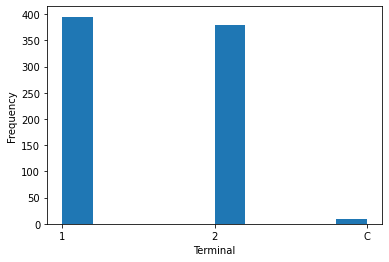

In [13]:
import matplotlib.pyplot as plt

plt.hist(df_arrivals['Terminal'])
plt.xlabel('Terminal')
plt.ylabel('Frequency')
plt.show()

In [30]:
df_arrivals_terminal = df_arrivals[(df_arrivals['Terminal']=='1') | (df_arrivals['Terminal'] == '2')]

df_arrivals_terminal

,Origin City,Origin Code,Arrival,Flight,Airline,Terminal,Status,Date,Reference Day,url,Date_Time,Origin Country,Parent Company
0,Calama,(CJC),00:03,LA379,LATAM Airlines,1,En Route [+],2023-05-03,yesterday,https://www.santiago-airport.com/scl-arrivals?day=yesterday&tp=0,2023-05-03 00:03:00,Chile,LATAM Airlines Group
1,Concepcion,(CCP),00:09,H2168,Sky Airline,1,Landed - On-time [+],2023-05-03,yesterday,https://www.santiago-airport.com/scl-arrivals?day=yesterday&tp=0,2023-05-03 00:09:00,Chile,Sky Airline S.A.
2,Puerto Montt,(PMC),00:22,LA266,LATAM Airlines,1,En Route [+],2023-05-03,yesterday,https://www.santiago-airport.com/scl-arrivals?day=yesterday&tp=0,2023-05-03 00:22:00,Chile,LATAM Airlines Group
3,Puerto Montt,(PMC),00:22,IB7248,Iberia,1,En Route [+],2023-05-03,yesterday,https://www.santiago-airport.com/scl-arrivals?day=yesterday&tp=0,2023-05-03 00:22:00,Chile,International Airlines Group
4,Sao Paulo,(GRU),00:25,LA751,LATAM Airlines,2,En Route [+],2023-05-03,yesterday,https://www.santiago-airport.com/scl-arrivals?day=yesterday&tp=0,2023-05-03 00:25:00,Brazil,LATAM Airlines Group
...,...,...,...,...,...,...,...,...,...,...,...,...,...
778,Florianopolis,(FLN),23:40,H2631,Sky Airline,2,Scheduled [+],2023-05-05,tomorrow,https://www.santiago-airport.com/scl-arrivals?day=tomorrow&tp=18,2023-05-05 23:40:00,Brazil,Sky Airline S.A.
779,La Serena,(LSC),23:44,JA127,JetSMART,1,Scheduled [+],2023-05-05,tomorrow,https://www.santiago-airport.com/scl-arrivals?day=tomorrow&tp=18,2023-05-05 23:44:00,Chile,Indigo Partners
780,Calama,(CJC),23:49,LA379,LATAM Airlines,1,Scheduled [+],2023-05-05,tomorrow,https://www.santiago-airport.com/scl-arrivals?day=tomorrow&tp=18,2023-05-05 23:49:00,Chile,LATAM Airlines Group
781,Concepcion,(CCP),23:59,LA12,LATAM Airlines,1,Scheduled [+],2023-05-05,tomorrow,https://www.santiago-airport.com/scl-arrivals?day=tomorrow&tp=18,2023-05-05 23:59:00,Chile,LATAM Airlines Group


In [24]:
contingency_table = pd.crosstab(df_arrivals_terminal['Terminal'], df_arrivals_terminal['Flight'])
contingency_table

Flight,5Y22,5Y34,5Y46,AA945,AA957,AC6152,AC92,AF406,AM7526,AR1280,...,QF4212,QF4213,QF8300,QR5354,QR8133,TK9656,UA847,UC1507,UX3056,WJ3012
Terminal,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,1,3,3,1,3,3,3,...,1,2,2,3,1,3,3,1,3,2


In [25]:
from scipy.stats import chi2_contingency

stat, p, dof, expected = chi2_contingency(contingency_table)

print('p-value:', p)

p-value: 8.1738867951671e-24


In [31]:
df_arrivals_terminal['Terminal'].count()

774

In [91]:
df_arrivals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 782 entries, 0 to 781
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Origin City     782 non-null    object        
 1   Origin Code     782 non-null    object        
 2   Arrival         782 non-null    object        
 3   Flight          782 non-null    object        
 4   Airline         782 non-null    object        
 5   Terminal        782 non-null    object        
 6   Status          782 non-null    object        
 7   Date            782 non-null    object        
 8   Reference Day   782 non-null    object        
 9   url             782 non-null    object        
 10  Date_Time       782 non-null    datetime64[ns]
 11  Origin Country  773 non-null    object        
 12  Parent Company  777 non-null    object        
dtypes: datetime64[ns](1), object(12)
memory usage: 79.5+ KB


In [92]:
from statsmodels.stats.proportion import proportions_ztest

# Extract data for the proportion test
n_obs = len(df_arrivals)
n_success = len(df_arrivals[df_arrivals['Origin Country'] == 'Argentina'])
p_null = 0.1  # Null hypothesis: the proportion of flights arriving from Argentina is 10%

# Conduct the proportion test
z_score, p_value = proportions_ztest(n_success, n_obs, p_null)

# Print the test results
if p_value < 0.05:
    print('The proportion of flights arriving from Argentina is significantly different from 10%')
else:
    print('The proportion of flights arriving from Argentina is not significantly different from 10%')


The proportion of flights arriving from Argentina is not significantly different from 10%


In [93]:
from scipy.stats import chi2_contingency

# Extract contingency table data for the chi-square test
contingency_table = pd.crosstab(df_arrivals['Airline'], df_arrivals['Terminal'])

# Conduct the chi-square test
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

# Print the test results
if p_value < 0.05:
    print('There is a significant association between airline and terminal used by the flights')
else:
    print('There is no significant association between airline and terminal used by the flights')


There is a significant association between airline and terminal used by the flights


In [95]:
from scipy.stats import ttest_ind

# Extract data for the two-sample t-test
arr_times_buenos = pd.to_datetime(df_arrivals[df_arrivals['Origin City'] == 'Buenos Aires']['Arrival'], format='%H:%M')
arr_times_santiago = pd.to_datetime(df_arrivals[df_arrivals['Origin City'] == 'Santiago']['Arrival'], format='%H:%M')

# Conduct the two-sample t-test
t_stat, p_value = ttest_ind(arr_times_buenos, arr_times_santiago)

# Print the test results
if p_value < 0.05:
    print('The mean arrival time of flights from Buenos Aires is significantly different from the mean arrival time of flights from Santiago')
else:
    print('The mean arrival time of flights from Buenos Aires is not significantly different from the mean arrival time of flights from Santiago')


The mean arrival time of flights from Buenos Aires is not significantly different from the mean arrival time of flights from Santiago


In [122]:
from scipy.stats import ttest_ind

# Extract data for the two-sample t-test
arr_times_A = pd.to_datetime(df_arrivals[df_arrivals['Origin City'] == 'Buenos Aires']['Arrival'], format='%H:%M')
arr_times_B = pd.to_datetime(df_arrivals[df_arrivals['Origin City'] == 'Santiago']['Arrival'], format='%H:%M')

# Conduct the two-sample t-test
t_stat, p_value = ttest_ind(arr_times_A, arr_times_B)

# Print the test results
if p_value < 0.05:
    print('The mean arrival time of flights from Buenos Aires is significantly different from the mean arrival time of flights from Santiago')
else:
    print('The mean arrival time of flights from Buenos Aires is not significantly different from the mean arrival time of flights from Santiago')


The mean arrival time of flights from Buenos Aires is not significantly different from the mean arrival time of flights from Santiago


In [127]:
df_arrivals[['Arrival', 'Origin City']]

df_arrivals[['Arrival', 'Origin City']].describe()

df_arrivals[['Arrival', 'Origin City']].info()

,Arrival,Origin City
0,00:25,Sao Paulo
1,00:25,Sao Paulo
2,00:41,Calama
3,00:52,Calama
4,00:52,Rio De Janeiro
...,...,...
777,23:30,Sao Paulo
778,23:30,Lima
779,23:34,Panama City
780,23:48,Puerto Montt


In [128]:
df_arrivals[['Arrival', 'Origin City']].describe()

,Arrival,Origin City
count,782,782
unique,348,51
top,21:05,Buenos Aires
freq,23,65


In [129]:
df_arrivals[['Arrival', 'Origin City']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 782 entries, 0 to 781
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Arrival      782 non-null    object
 1   Origin City  782 non-null    object
dtypes: object(2)
memory usage: 12.3+ KB


In [134]:
# Select data for Sao Paulo and Miami
arr_times_A = pd.to_datetime(df_arrivals[df_arrivals['Origin City'] == 'Buenos Aires']['Arrival'], format='%H:%M')
arr_times_B = pd.to_datetime(df_arrivals[df_arrivals['Origin City'] == 'Santiago']['Arrival'], format='%H:%M')


# Perform t-test analysis
t_stat, p_value = ttest_ind(arr_times_A, arr_times_B)

# Print results
print('t-statistic:', t_stat)
print('p-value:', p_value)

t-statistic: nan
p-value: nan


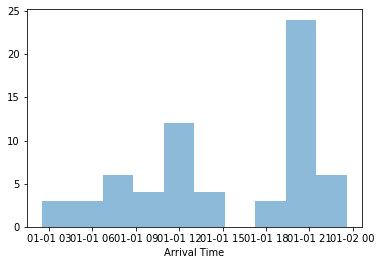

In [140]:
# Create histograms for each group
plt.hist(arr_times_A, alpha=0.5, label='Sao Paulo')
# plt.hist(arr_times_B, alpha=0.5, label='Miami')

# Add labels and legend
plt.xlabel('Arrival Time')
# plt.ylabel('Frequency')

# Show the plot

plt.show()